In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os

Loading & Processing UTK Face 🧔‍♂️
The UTKFace dataset, found on Kaggle, is a comprehensive collection of facial images specifically curated for age and gender recognition tasks. It comprises over 20,000 images of human faces with annotations for age, gender, and ethnicity. These images are diverse, representing various races, ages, and genders, making it an extensive and valuable resource for machine learning and computer vision research.

Each image in the UTKFace dataset is labeled with the person's age, ranging from 0 to 116 years old, and their gender, classified as male or female.

Additionally, the dataset includes information about the person's ethnicity, allowing for more nuanced analyses and applications.

Researchers and developers often utilize this dataset to train and test algorithms for age estimation, gender classification, and other related tasks in facial recognition technology. Its large size and diverse

**Path to dataset**

In [ ]:
import os
path = "/content/drive/MyDrive/Projects/crop_part1/"
files = os.listdir(path)
size = len(files)
print("Total samples:",size)
print(files[0])

Total samples: 9810
15_0_0_20170110224324459.jpg.chip.jpg


**Load text image from given dataset folder**

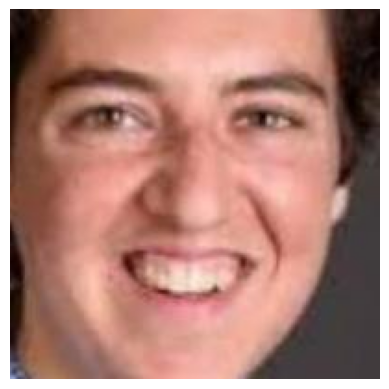

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Assuming you have the path to the folder containing the images in the dataset
folder_path = "/content/drive/MyDrive/Projects/crop_part1/"

# Get a list of image filenames in the folder
image_files = os.listdir(folder_path)

# Select a random image from the list
image_filename = random.choice(image_files)

# Construct the full path to the selected image
image_path = os.path.join(folder_path, image_filename)

# Load the image using PIL
image = Image.open(image_path)

# Plot the image with original colors
plt.imshow(image)
plt.axis('off')
plt.show()


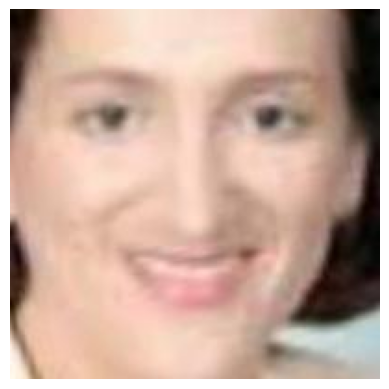

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Assuming you have the path to the folder containing the images in the dataset
folder_path = "/content/drive/MyDrive/Projects/crop_part1"

# Get a list of image filenames in the folder
image_files = os.listdir(folder_path)

# Select an image index (0-based)
image_index = 9779  # Replace with the desired index

# Check if the index is within the range of available images
if 0 <= image_index < len(image_files):
    # Get the filename of the image at the specified index
    image_filename = image_files[image_index]

    # Construct the full path to the selected image
    image_path = os.path.join(folder_path, image_filename)

    # Load the image using PIL
    image = Image.open(image_path)

    # Plot the image with original colors
    plt.imshow(image)
    plt.axis('off')
    plt.show()
else:
    print("Invalid image index.")


In [ ]:
import cv2
images = []
ages = []
genders = []
for file in files:
    image = cv2.imread(path+file,0)
    image = cv2.resize(image,dsize=(64,64))
    image = image.reshape((image.shape[0],image.shape[1],1))
    images.append(image)
    split_var = file.split('_')
    ages.append(split_var[0])
    genders.append(int(split_var[1]) )



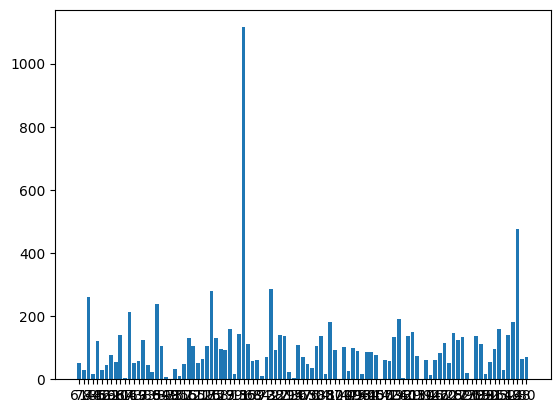

Max value: 99


In [ ]:
import matplotlib.pyplot as plt
x_ages = list(set(ages))
y_ages = [ages.count(i) for i in x_ages]
plt.bar(x_ages,y_ages)
plt.show()
print("Max value:",max(ages))

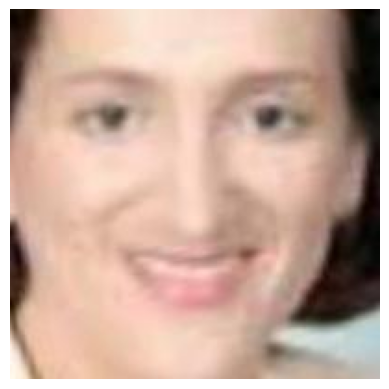

Gender: 1 Age: 32


In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def display(image):
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

# Assuming you have the path to the folder containing the images in the dataset
folder_path = "/content/drive/MyDrive/Projects/crop_part1/"

# Get a list of image filenames in the folder
image_files = os.listdir(folder_path)

# Select an image index (0-based)
index = 9779  # Replace with the desired index

# Check if the index is within the range of available images
if 0 <= index < len(image_files):
    # Get the filename of the image at the specified index
    image_filename = image_files[index]

    # Construct the full path to the selected image
    image_path = os.path.join(folder_path, image_filename)

    # Load the image using PIL
    image = Image.open(image_path)

    # Display the image
    display(image)

    # Get the corresponding age and gender information
    gender = genders[index]
    age = ages[index]

    # Print the age and gender information
    print("Gender:", gender, "Age:", age)
else:
    print("Invalid image index.")


**display image in grayscale**

Gender: 1 Age: 32


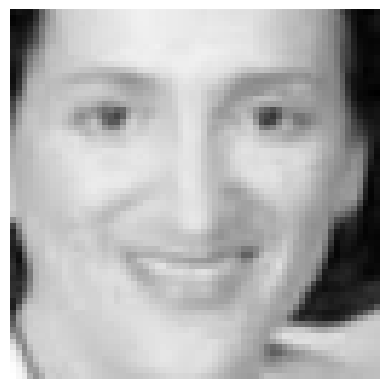

In [ ]:
def display(img):
    plt.axis('off')
    plt.imshow(img[:,:,0])
    plt.set_cmap('gray')
    plt.show()
idx = 9779
sample = images[idx]
print("Gender:",genders[idx],"Age:",ages[idx])
display(sample)

In [ ]:
def age_group(age):
    if age >=0 and age < 18:
        return 1
    elif age < 30:
        return 2
    elif age < 80:
        return 3
    else:
        return 4

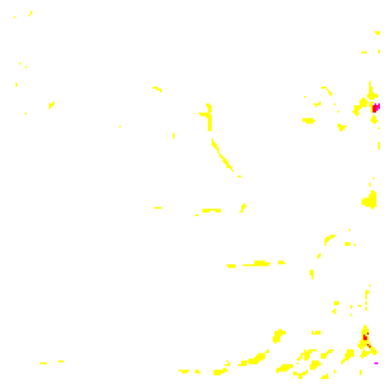

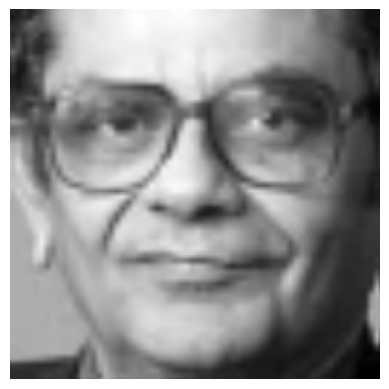

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.transform import resize

def display(image):
    plt.imshow(image.squeeze(), cmap='gray')  # Squeeze to remove the single-channel dimension
    plt.axis('off')
    plt.show()

# Assuming you have the path to the folder containing the images in the dataset
folder_path = "/content/drive/MyDrive/Projects/crop_part1/"

# Get a list of image filenames in the folder
image_files = os.listdir(folder_path)

# Select an image index (0-based)
index = 550  # Replace with the desired index

# Check if the index is within the range of available images
if 0 <= index < len(image_files):
    # Get the filename of the image at the specified index
    image_filename = image_files[index]

    # Construct the full path to the selected image
    image_path = os.path.join(folder_path, image_filename)

    # Load the image using PIL
    image = Image.open(image_path)

    # Convert the PIL image to a numpy array
    sample = np.array(image)

    # Resize the image to the desired target shape
    target_shape = (200, 200)
    sample_resized = resize(sample, target_shape, preserve_range=True)

    # Display the image
    display(sample_resized)

    # Perform preprocessing on the loaded image
    target = np.zeros((size, 2), dtype='float32')
    features = np.zeros((size, target_shape[0], target_shape[1], 1), dtype='float32')

    for i in range(size):
        target[i, 0] = age_group(int(ages[i])) / 4
        target[i, 1] = int(genders[i])
        image_resized = resize(images[i], target_shape, preserve_range=True)
        features[i] = image_resized.reshape((*target_shape, 1))

    features = features / 255

    # Display the preprocessed image
    display(features[index])
else:
    print("Invalid image index.")


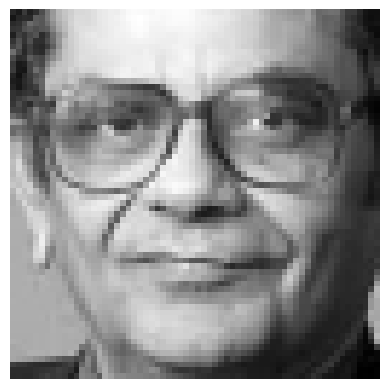

In [ ]:
import cv2
import numpy as np

# Assuming you have already defined size, ages, genders, and images
# Initialize arrays for target and features
target = np.zeros((size, 2), dtype='float32')
features = np.zeros((size, 64, 64, 1), dtype='float32')  # Assuming 64x64 images

# Define a function to resize images
def resize_image(image):
    return cv2.resize(image, (64, 64))[:, :, np.newaxis]  # Add channel dimension

# Preprocess data
for i in range(size):
    # Process target data
    target[i, 0] = age_group(int(ages[i])) / 4
    target[i, 1] = int(genders[i])

    # Process image data
    resized_image = resize_image(images[i])
    features[i] = resized_image

# Normalize pixel values
features = features / 255.0

# Display preprocessed features for a sample
display(features[550])


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2,shuffle  = True)
print("Samples in Training:",x_train.shape[0])
print("Samples in Testing:",x_test.shape[0])

Samples in Training: 7848
Samples in Testing: 1962


In [ ]:
print("Shape of image:",sample.shape)

Shape of image: (200, 200, 3)


In [ ]:
import keras
from keras.layers import *
from keras.models import *
from keras import backend as K

**CNN model**

In [ ]:
inputs = Input(shape=(64,64,1))
conv1 = Conv2D(32, kernel_size=(3, 3),activation='relu')(inputs)
conv2 = Conv2D(64, kernel_size=(3, 3),activation='relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(128, kernel_size=(3, 3),activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv3)
x = Dropout(0.25)(pool2)
flat = Flatten()(x)

dropout = Dropout(0.5)
age_model = Dense(128, activation='relu')(flat)
age_model = dropout(age_model)
age_model = Dense(64, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(32, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(1, activation='relu')(age_model)

dropout = Dropout(0.5)
gender_model = Dense(128, activation='relu')(flat)
gender_model = dropout(gender_model)
gender_model = Dense(64, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(32, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(16, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(8, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(1, activation='sigmoid')(gender_model)

In [ ]:
model = Model(inputs=inputs, outputs=[age_model,gender_model])
model.compile(optimizer = 'adam', loss =['mse','binary_crossentropy'],metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 64, 64, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 62, 62, 32)           320       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 60, 60, 64)           18496     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 30, 30, 64)           0         ['conv2d_1[0][0]']            
 D)                                                                                           

In [ ]:
history = model.fit(x_train,[y_train[:,0],y_train[:,1]],validation_data=(x_test,[y_test[:,0],y_test[:,1]]),epochs = 20, batch_size=512,shuffle = True)

Epoch 1/20
16/16 [==============================] - 235s 14s/step - loss: 0.5630 - dense_3_loss: 0.0471 - dense_9_loss: 0.5159 - dense_3_accuracy: 0.0311 - dense_9_accuracy: 0.7798 - val_loss: 0.5534 - val_dense_3_loss: 0.0387 - val_dense_9_loss: 0.5147 - val_dense_3_accuracy: 0.0341 - val_dense_9_accuracy: 0.7696
Epoch 2/20
16/16 [==============================] - 204s 13s/step - loss: 0.5650 - dense_3_loss: 0.0480 - dense_9_loss: 0.5170 - dense_3_accuracy: 0.0322 - dense_9_accuracy: 0.7857 - val_loss: 0.5448 - val_dense_3_loss: 0.0400 - val_dense_9_loss: 0.5048 - val_dense_3_accuracy: 0.0316 - val_dense_9_accuracy: 0.7864
Epoch 3/20
16/16 [==============================] - 206s 13s/step - loss: 0.5480 - dense_3_loss: 0.0469 - dense_9_loss: 0.5011 - dense_3_accuracy: 0.0331 - dense_9_accuracy: 0.7927 - val_loss: 0.5290 - val_dense_3_loss: 0.0353 - val_dense_9_loss: 0.4937 - val_dense_3_accuracy: 0.0347 - val_dense_9_accuracy: 0.7936
Epoch 4/20
16/16 [==============================] - 

In [ ]:
model.save('data.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#from google.colab import files

# Download the saved model file
#files.download('data.h5')


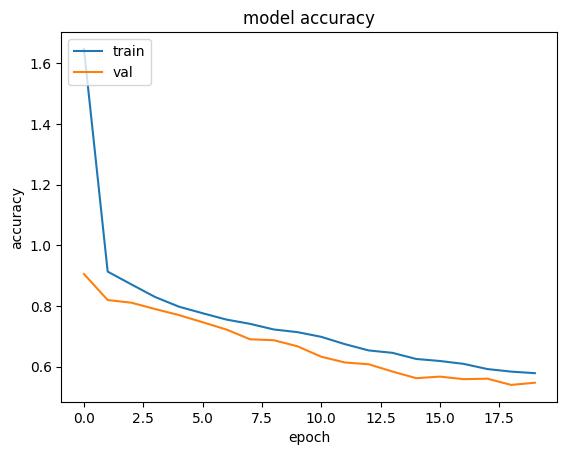

In [ ]:
history = history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 312ms/step
Values: [array([[0.5258431]], dtype=float32), array([[0.9655836]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 19-30
1/1 [==============================] - 0s 43ms/step
Values: [array([[0.4320848]], dtype=float32), array([[0.49588114]], dtype=float32)] 
Predicted Gender: Male Predicted Age: 19-30
1/1 [==============================] - 0s 43ms/step
Values: [array([[0.51227975]], dtype=float32), array([[0.46452174]], dtype=float32)] 
Predicted Gender: Male Predicted Age: 19-30
1/1 [==============================] - 0s 42ms/step
Values: [array([[0.44186395]], dtype=float32), array([[0.99262697]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 19-30
1/1 [==============================] - 0s 48ms/step
Values: [array([[0.54586565]], dtype=float32), array([[0.99859965]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 19-30
1/1 [==============================] - 0s 48ms/step
Values: [array([[0.4437548]], dtyp

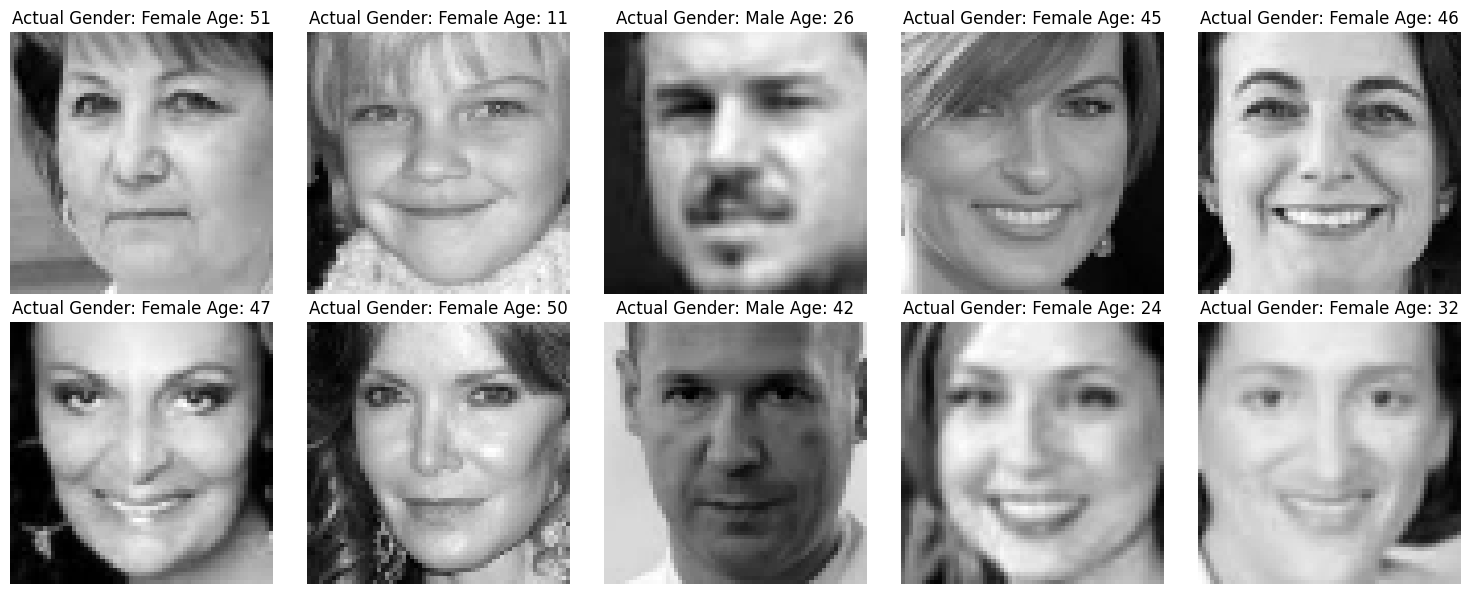

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# # Plot the image with original colors
# plt.imshow(image)
# plt.axis('off')
# plt.show()


def display(img):
   plt.axis('off')
   plt.imshow(img)
   plt.show()

def age_group(age):
    if age >= 0 and age < 18:
        return 1
    elif age < 30:
        return 2
    elif age < 80:
        return 3
    else:
        return 4

def get_age(distr):
    distr = distr * 4
    if 0.65 <= distr <= 1.4:
        return "0-18"
    elif 1.65 <= distr <= 2.4:
        return "19-30"
    elif 2.65 <= distr <= 3.4:
        return "31-80"
    elif 3.65 <= distr <= 4.4:
        return "80+"
    else:
        return "Unknown"

def get_gender(prob):
    if prob < 0.5:
        return "Male"
    else:
        return "Female"

def get_result(sample):
    sample = sample / 255.0
    val = model.predict(np.array([sample]))
    age = get_age(val[0])
    gender = get_gender(val[1])
    print("Values:", val, "\nPredicted Gender:", gender, "Predicted Age:", age)

# Adjust the number of images per row as needed
images_per_row = 5

indexes = [500, 59, 80, 2, 4546, 7, 9, 256, 7500, 9779]
num_images = len(indexes)
num_rows = (num_images - 1) // images_per_row + 1

fig, axes = plt.subplots(num_rows, images_per_row, figsize=(15, num_rows * 3))
axes = axes.ravel()

for i, idx in enumerate(indexes):
    sample = images[idx]
    axes[i].imshow(sample)
    axes[i].axis('off')
    axes[i].set_title("Actual Gender: {} Age: {}".format(get_gender(genders[idx]), ages[idx]))

    # Run prediction and display the result
    res = get_result(sample)

# Remove empty subplots if the number of images is not a multiple of images_per_row
if num_images % images_per_row != 0:
    for i in range(num_images, num_rows * images_per_row):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


***SVM classifier***

In [ ]:
# Import necessary libraries
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Define the SVM model
svm = SVC(kernel='linear', C=1)

In [ ]:
# Extract the features from the CNN model
features_train = model.predict(x_train)
features_test = model.predict(x_test)

In [ ]:
import os
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data = []
target_gender = []
target_age = []

# Get a list of all the image files in the directory
image_files = os.listdir('/content/drive/MyDrive/Projects/crop_part1')

# Loop through the image files and extract features
for image_file in image_files:
    image_path = os.path.join('/content/drive/MyDrive/Projects/crop_part1', image_file)
    image = cv2.imread(image_path)
    image = cv2.resize(image, (64, 64))
    data.append(image)
    target_gender.append(int(image_file.split('_')[1]))
    target_age.append(int(image_file.split('_')[0]))

# Convert data and targets to numpy arrays
data = np.array(data)
target_gender = np.array(target_gender)
target_age = np.array(target_age)

# Split the data into train and test sets
X_train, X_test, y_train_gender, y_test_gender, y_train_age, y_test_age = train_test_split(data, target_gender, target_age, test_size=0.2, random_state=42)

# Flatten the image data
num_samples, height, width, depth = X_train.shape
X_train = X_train.reshape(num_samples, height * width * depth)
num_samples, height, width, depth = X_test.shape
X_test = X_test.reshape(num_samples, height * width * depth)

# Train the gender classifier
svm_gender = SVC()
svm_gender.fit(X_train, y_train_gender)

# Train the age classifier
svm_age = SVC()
svm_age.fit(X_train, y_train_age)

# Make predictions on the test set
y_pred_gender = svm_gender.predict(X_test)
y_pred_age = svm_age.predict(X_test)

# Calculate accuracy scores
accuracy_gender = accuracy_score(y_test_gender, y_pred_gender)
accuracy_age = accuracy_score(y_test_age, y_pred_age)

# Print the accuracy scores
print("Gender Accuracy:", accuracy_gender)
print("Age Accuracy:", accuracy_age)


Gender Accuracy: 0.8083588175331294
Age Accuracy: 0.15392456676860347


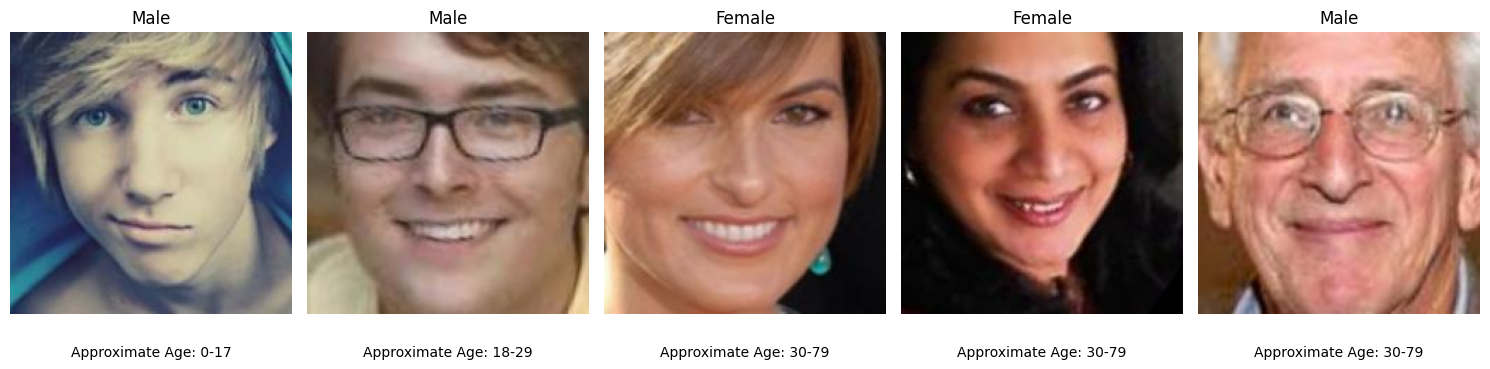

In [7]:
import os
import cv2
import matplotlib.pyplot as plt

# Dataset directory
dataset_dir = '/content/drive/MyDrive/Projects/crop_part1'

# Get a list of image files
image_files = os.listdir(dataset_dir)

# Number of images to plot
num_images = 5

gender_labels = {
    '0': 'Male',
    '1': 'Female',
    # Add more gender labels as needed
}

age_labels = {
    1: '0-17',
    2: '18-29',
    3: '30-79',
    4: '80+',
}

# Age group function
def age_group(age):
    if age >= 0 and age < 18:
        return 1
    elif age < 30:
        return 2
    elif age < 80:
        return 3
    else:
        return 4

# Plot the images
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

for i in range(num_images):
    image_path = os.path.join(dataset_dir, image_files[i])
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Extract the age and gender labels from the image file name
    age = int(image_files[i].split('_')[0])
    gender = image_files[i].split('_')[1]

    axes[i].imshow(image)
    axes[i].axis('off')

    # Add the gender label as the title
    axes[i].set_title(gender_labels.get(gender, "Unknown"))

    # Get the age group label using the age_group function
    age_group_label = age_labels.get(age_group(age), "Unknown")

    # Add the age label as separate text below the image
    axes[i].text(0.5, -0.15, f'Approximate Age: {age_group_label}', ha='center', transform=axes[i].transAxes)

plt.tight_layout()
plt.show()
